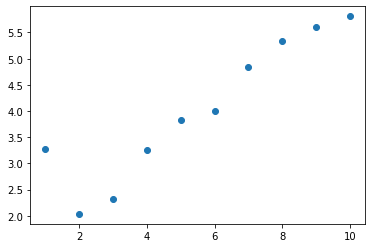

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("output_fm.csv")
df.loc[0, "y_noise"] += 1.5

d_obs = df["y_noise"]
xi = df["xi"]

plt.plot(xi, d_obs, 'o')
plt.show()

In [2]:
# inversion

G = np.column_stack([xi**0, xi])

m_calc = (np.linalg.inv(np.transpose(G).dot(G)).dot(np.transpose(G))).dot(d_obs)

d_calc = m_calc[0] + m_calc[1]*xi
m_calc

array([1.77183394, 0.41125925])

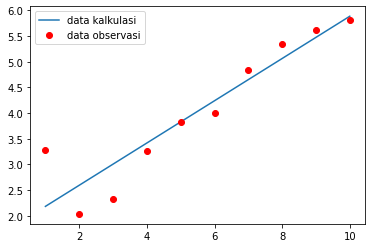

In [3]:
# plot
plt.plot(xi, d_calc, label="data kalkulasi")
plt.plot(xi, df["y_noise"], 'ro', label="data observasi")
plt.legend()
plt.show()

In [4]:
# weighting
We = np.identity(len(xi))
We[0,0] = 0.01
#We[9,9] = 10
We

array([[0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

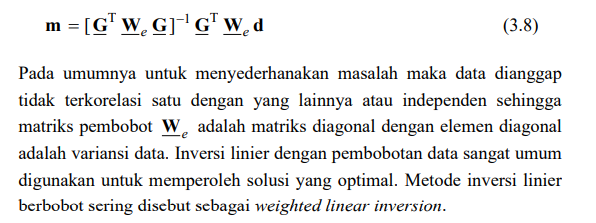

In [5]:
m_calc_we = (((np.linalg.inv((np.transpose(G).dot(We)).dot(G))).dot(np.transpose(G))).dot(We)).dot(d_obs)
d_calc_we = m_calc_we[0] + m_calc_we[1]*xi

m_calc_we

array([1.11298658, 0.50110207])

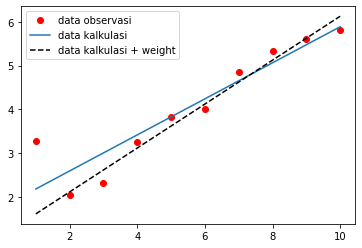

In [6]:
# y_err
y_err = 0.389


# plot
plt.plot(xi, d_obs, 'ro', label="data observasi")
plt.plot(xi, d_calc, label="data kalkulasi")
plt.plot(xi, d_calc_we, "k--", label="data kalkulasi + weight")

#plt.errorbar(xi,d_obs, yerr=y_err, fmt='ro', label="error")
plt.legend()
plt.show()

## Error No Weight

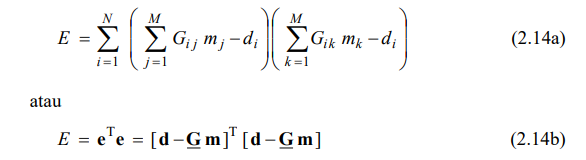

In [11]:
E_no_weight = np.transpose(d_obs - (G.dot(m_calc))).dot(d_obs - (G.dot(m_calc))) # no weight
E_no_weight

2.1930042155862006

In [8]:
e_leastsq_no_weight = np.sum((d_calc - d_obs)**2) # no weight
e_leastsq_no_weight

2.193004215586201

## Error With Weight

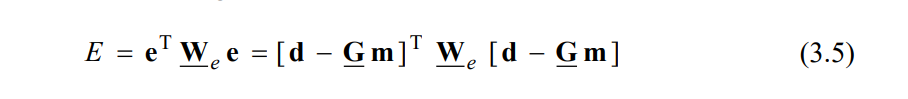

In [9]:
E_with_weight = np.transpose(d_obs - (G.dot(m_calc_we))).dot(We).dot(d_obs - (G.dot(m_calc_we))) # with weight
E_with_weight

0.3898190020174934

In [10]:
e_leastsq_with_weight = np.sum(We.dot((d_calc_we - d_obs)**2)) # with weight
e_leastsq_with_weight

0.3898190020174934